In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert7/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert7/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert7/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert7/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert7/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert7/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert7/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert7/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert7/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')\n"

In [4]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(36, 288, 36, 288, 36, 36)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [6]:
len(x_audio_train_prediction),len(x_train_prediction)

(324, 324)

In [7]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [9]:
len(df_train)

324

In [10]:
df_train

,labels
0,3
1,2
2,1
3,1
4,3
...,...
319,0
320,2
321,4
322,2


In [11]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [12]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.000008,0.000718,0.000897,0.000010,0.998367,1.293121e-05,0.003533,0.000001,0.001411,0.995042
1,0.000183,0.000136,0.001506,0.998138,0.000037,9.157298e-04,0.001304,0.000286,0.997159,0.000335
2,0.998626,0.000012,0.000673,0.000668,0.000021,9.510992e-01,0.006071,0.029216,0.003981,0.009633
3,0.000016,0.000063,0.000112,0.999803,0.000005,3.725264e-03,0.035834,0.001569,0.835215,0.123657
4,0.005097,0.000023,0.991394,0.002918,0.000568,8.821261e-05,0.000003,0.999762,0.000037,0.000110
5,0.000015,0.998254,0.000025,0.000479,0.001227,1.170919e-04,0.228914,0.001433,0.769435,0.000101
6,0.000011,0.998416,0.000030,0.000323,0.001220,1.428427e-06,0.998453,0.000004,0.000096,0.001445
7,0.005187,0.001669,0.000381,0.992725,0.000038,8.459749e-01,0.043516,0.058314,0.040337,0.011859
8,0.998656,0.000011,0.000733,0.000579,0.000022,9.767503e-01,0.000428,0.021404,0.000178,0.001239
9,0.998995,0.000011,0.000399,0.000582,0.000014,9.906994e-01,0.000009,0.001868,0.007308,0.000116


In [13]:
len(x_test),len(x_train)

(36, 324)

In [14]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.000290,0.000344,0.000296,0.999055,0.000015,0.000137,0.020892,0.000005,0.978926,0.000041
1,0.047349,0.000008,0.951372,0.000886,0.000385,0.065134,0.000336,0.916116,0.004339,0.014074
2,0.000015,0.998328,0.000027,0.001381,0.000250,0.000015,0.993193,0.000061,0.005909,0.000823
3,0.000012,0.998398,0.000027,0.000312,0.001252,0.000006,0.969847,0.000057,0.000007,0.030083
4,0.000028,0.000352,0.000140,0.999475,0.000005,0.004833,0.148489,0.004092,0.841671,0.000914
...,...,...,...,...,...,...,...,...,...,...
319,0.998668,0.000013,0.000511,0.000790,0.000019,0.669082,0.000234,0.301190,0.000808,0.028686
320,0.033827,0.000677,0.185898,0.778432,0.001166,0.265432,0.002066,0.721690,0.009396,0.001416
321,0.000058,0.000866,0.002526,0.000101,0.996449,0.000044,0.038501,0.000008,0.930038,0.031408
322,0.000315,0.000006,0.998558,0.000155,0.000966,0.045603,0.000715,0.952580,0.000016,0.001085


In [15]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [16]:
len(new_y_train)

324

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

# training machine learning

In [18]:
from sklearn.svm import SVC
model = SVC(random_state=seed, kernel='linear')
svm=model.fit(new_x_train,new_y_train)
predictions = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [19]:
predictions

array([4, 3, 0, 3, 2, 1, 1, 2, 0, 0, 0, 0, 4, 0, 1, 1, 0, 1, 1, 2, 1, 0,
       3, 0, 0, 3, 3, 2, 1, 4, 1, 4, 3, 1, 2, 2])

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       1.00      1.00      1.00        10
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36

----accuracy score 97.22222222222221 ----


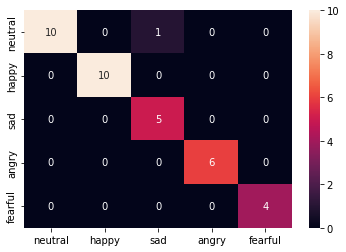

In [20]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [21]:
path='/content/drive/My Drive/fusion/savee_fusion_model/svm/linear/expert7'
savedvX = joblib.dump(svm, path)

print("MODEL SAVED")

MODEL SAVED
